<a href="https://colab.research.google.com/github/vaishnavikondaparthy/MachineLearning/blob/main/5.4_RandomForest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RANDOM FOREST CLASSIFIER

Drive link for csv file:https://drive.google.com/file/d/1rf6C1n19uv2aiqw_wVD0wNrC2Ycz-TF9/view?usp=drive_link

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#read csv file
df=pd.read_csv("/content/banknote_authentication.csv")

In [3]:
df.columns

Index(['variance', 'skew', 'kurtosis', 'entropy', 'authentic'], dtype='object')

In [4]:
#check for null values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [5]:
#count the number of values in each class
df['authentic'].value_counts()

0    762
1    610
Name: authentic, dtype: int64

In [6]:
df.sample(n=5,random_state=55).sort_values(['variance'])

,variance,skew,kurtosis,entropy,authentic
1180,-2.21830,-1.2540,2.9986,0.36378,1
769,-0.89409,3.1991,-1.8219,-2.94520,1
1353,0.11592,3.2219,-3.4302,-2.84570,1
239,2.39520,9.5083,-3.1783,-3.00860,0
722,4.84510,8.1116,-2.9512,-1.47240,0


In [7]:
#split data into inputs and outputs
X=df.drop("authentic",axis=1)
y=df["authentic"]

In [8]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [9]:
#import RandomForestClassifier model and train it
from sklearn.ensemble import RandomForestClassifier
Classifier=RandomForestClassifier(random_state=0,min_samples_leaf=10)
Classifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=0)

In [10]:
#predict the values
y_test_hat=Classifier.predict(X_test)
Results=pd.DataFrame({'actual':y_test})
columns=pd.DataFrame({'prediction':y_test_hat})
Results=Results.join(columns.set_index(Results.index))
print(Results.head(10))

      actual  prediction
1240       1           1
703        0           0
821        1           1
1081       1           1
37         0           0
167        0           0
223        0           0
647        0           0
325        0           0
558        0           0


In [11]:
#check accuracy of testing data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat))

0.9878640776699029


In [12]:
#check accuracy of training data
y_train_hat=Classifier.predict(X_train)
print(accuracy_score(y_train,y_train_hat))

0.9885416666666667


In [13]:
#print confusion matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_score
cm=confusion_matrix(y_test,y_test_hat)
print(cm)

[[231   4]
 [  1 176]]


In [14]:
#calculate recall, precision, specificity
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]
recall=TP/float(FN+TN)
precision=TP/float(TP+FP)
specificity=TN/float(TN+FP)
print("recall,precision,specificity=",recall,precision,specificity)

recall,precision,specificity= 0.7586206896551724 0.9777777777777777 0.9829787234042553


In [15]:
#print importance of each feature
feature_importances=pd.DataFrame(Classifier.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance')
feature_importances

,importance
entropy,0.043526
kurtosis,0.133505
skew,0.223925
variance,0.599044


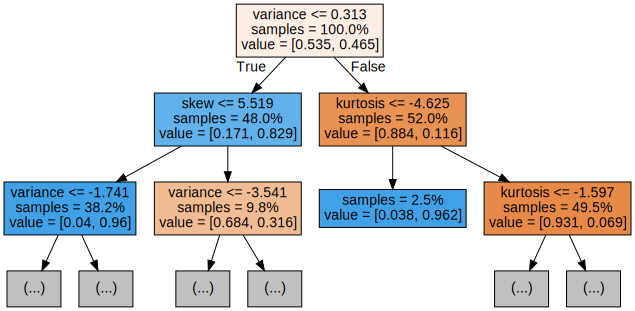

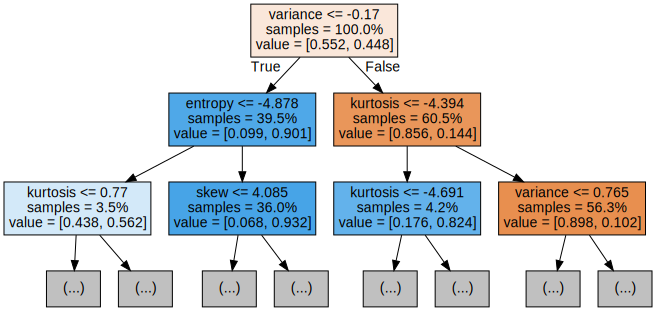

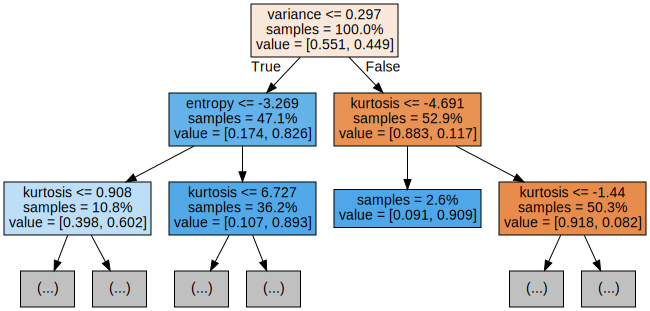

In [16]:
#visualize 3 trees
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree=Classifier.estimators_[i]
    dot_data=export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph=graphviz.Source(dot_data)
    display(graph)